In [1]:
import torch
import matplotlib.pyplot as plt
import pathlib
from ruamel import yaml

from wavebench.dataloaders.rtc_loader import get_dataloaders_rtc_thick_lines
from wavebench import wavebench_path
from wavebench.nn.pl_model_wrapper import LitModel

In [8]:
task = 'rtc'
medium = 'gaussian_lens'
model = 'unet'
version = 1
model_save_dir = f'{wavebench_path}/saved_models/{task}_{medium}/{model}/version_{version}/'

checkpoint = list(pathlib.Path(f'{model_save_dir}/checkpoints').glob('*.ckpt'))[0]

In [9]:
net =  LitModel.load_from_checkpoint(
  checkpoint_path=checkpoint)

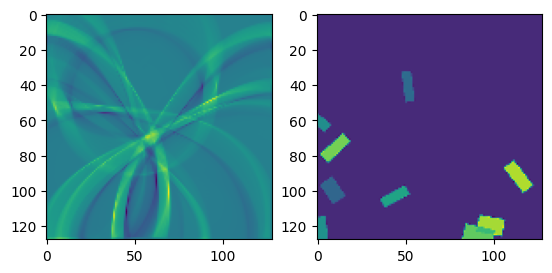

In [10]:
if task == 'rtc':
    loaders = get_dataloaders_rtc_thick_lines(
    medium_type=medium
    )

idx = 1
a, b = loaders['train'].dataset.__getitem__(idx)

fig, axes = plt.subplots(1, 2)

axes[0].imshow(a.squeeze().numpy())
axes[1].imshow(b.squeeze().numpy())#'gaussian_lens'


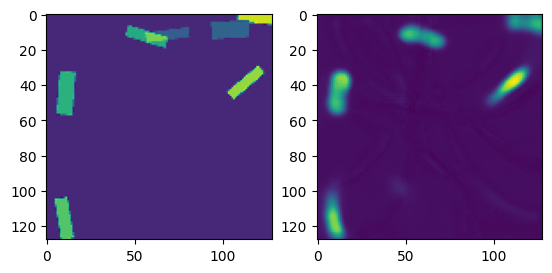

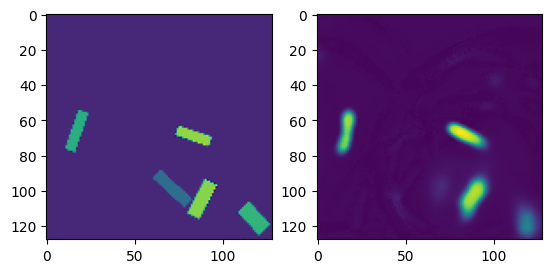

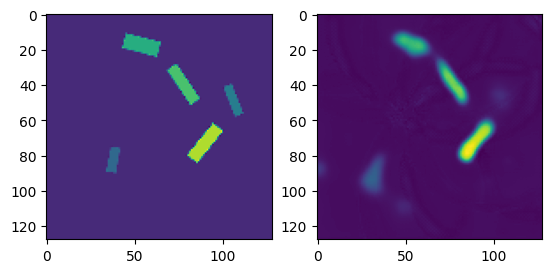

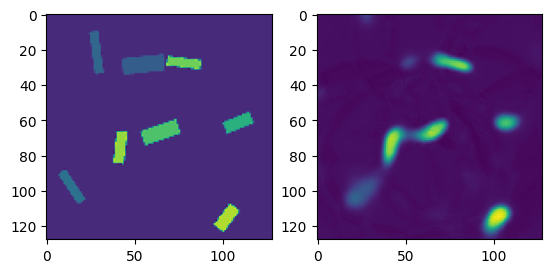

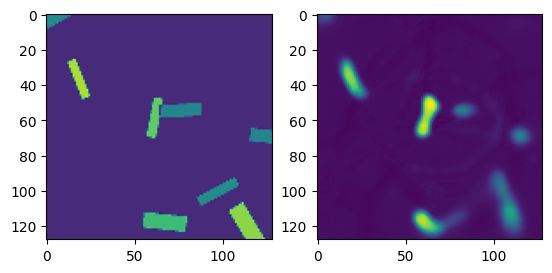

In [11]:
for idx in range(5):
  a, b = loaders['test'].dataset.__getitem__(idx)
  with torch.no_grad():
    out = net(a.unsqueeze(0).cuda()).detach().cpu()

  fig, axes = plt.subplots(1, 2)

  axes[0].imshow(b.squeeze().numpy())#'gaussian_lens'
  axes[1].imshow(out.squeeze().numpy())#'gaussian_lens'
